## Employees Data Set
**DataSet**  :   [Employees](https://drive.google.com/drive/u/2/folders/13dpzjmBgQN-m0t9rw7K46fbHW-tJNqjM)
<img src="https://www.pngitem.com/pimgs/m/208-2088755_employee-engagement-software-helps-you-gauge-how-passionate.png"
    style="width:300px;"></img>



In [ ]:
###### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data=pd.read_csv("employees.csv")

In [3]:
Data.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


> ### Rows and Columns

In [4]:
Row=Data.shape[0]
Col=Data.shape[1]

print("Rows : "  , Row)
print("Columns : "  , Col)



Rows :  1000
Columns :  8


> ## Data  Preprocessing

> ### Identify the Data Types of Columns

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


> ### Convert Date Column

In [6]:
Data['Start Date']=pd.to_datetime(Data['Start Date'])
Data['Last Login Time']=pd.to_datetime(Data['Last Login Time'])

> ### Checking Missing Values

In [7]:
Data.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

> ### Fill the Missing Values with Mode

In [8]:
Data['First Name']= Data['First Name'].fillna(Data['First Name'].value_counts().index[0])
Data['Gender']= Data['Gender'].fillna(Data['Gender'].value_counts().index[0])
Data['Team']= Data['Team'].fillna(Data['Team'].value_counts().index[0])

 > ### Clean Missing Values

In [9]:
Data.isnull().sum()

First Name            0
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                  0
dtype: int64

> ### Statistical Values of Numerical Columns

In [59]:
Data.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


> ### Number of Employees In each Team

In [10]:
Data['Team'].value_counts()

Client Services         149
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: Team, dtype: int64

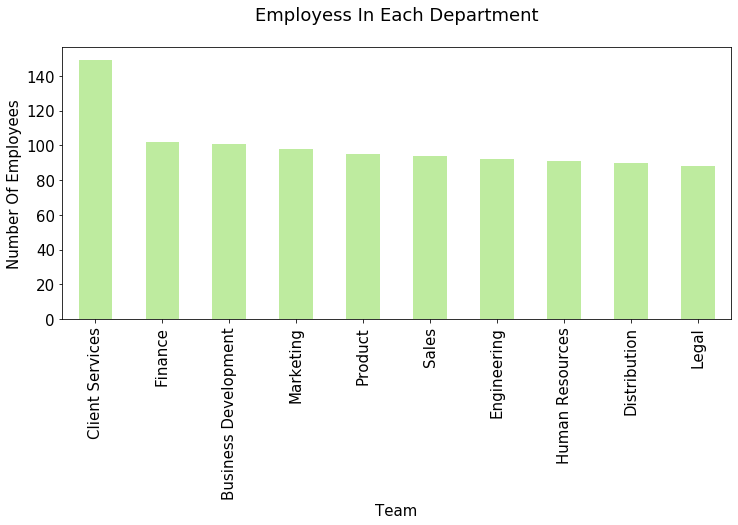

In [11]:
Plot=Data['Team'].value_counts().plot(kind='bar',figsize=(12,5),fontsize=15,color='#beeb9f')
plt.title("Employess In Each Department\n",fontsize=18)
plt.xlabel("Team",fontsize=15)
plt.ylabel("Number Of Employees",fontsize=15)
plt.show()

 > ### Numbers of Seniors in Company

In [12]:
Data.loc[Data['Senior Management'] ==True , 'Team' ].value_counts()

Client Services         60
Business Development    54
Marketing               49
Engineering             49
Sales                   48
Finance                 46
Human Resources         45
Legal                   41
Distribution            38
Product                 38
Name: Team, dtype: int64

> ### Numbers Of Juniors In Company

In [13]:
Data.loc[Data['Senior Management'] ==False , 'Team' ].value_counts()

Client Services         74
Product                 54
Finance                 51
Legal                   45
Business Development    45
Marketing               42
Human Resources         40
Distribution            39
Sales                   38
Engineering             37
Name: Team, dtype: int64

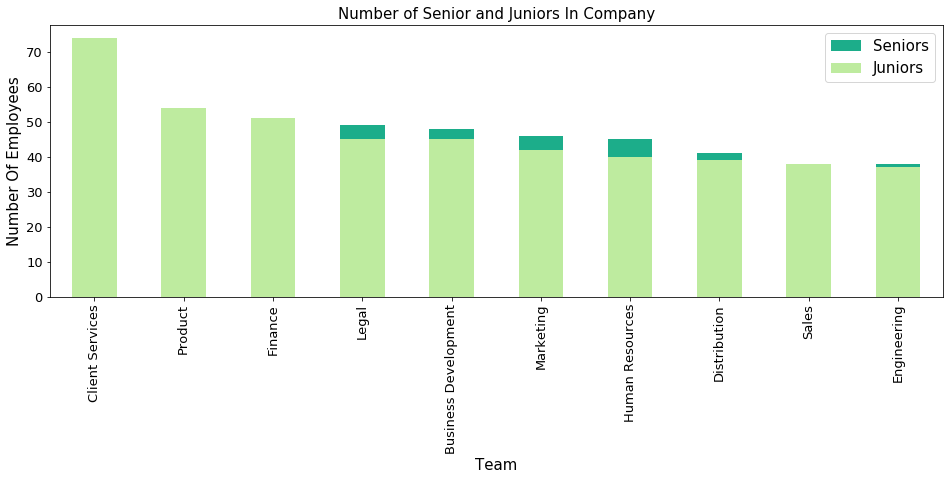

In [14]:
figsize=plt.figure(figsize=(16,5))
Manage=["Seniors","Juniors"]
Data.loc[Data['Senior Management'] ==True , 'Team' ].value_counts().plot(kind='bar',color='#1cad8a',fontsize=13)
Data.loc[Data['Senior Management'] ==False , 'Team' ].value_counts().plot(kind='bar',fontsize=13,color='#beeb9f')
plt.title("Number of Senior and Juniors In Company",fontsize=15)
plt.xlabel("Team",fontsize=15)
plt.ylabel("Number Of Employees",fontsize=15)
plt.legend(Manage,loc=1,fontsize=15)
plt.show()


> ### Greater than one Lac salary of Employees Quantity

In [15]:
Data.loc[(Data["Salary"]>10_0000) & (Data["Team"]) ].shape[0]

409

> ### Less than one Lac salary of Employees Quantity

In [16]:
Data.loc[(Data["Salary"]<10_0000) & (Data["Team"]) ].shape[0]

591

> ###  Number Of Juniors And Senior In Client Sercvices

In [17]:
Data.loc[Data["Team"] =='Client Services' , 'Senior Management'].value_counts()

False    74
True     60
Name: Senior Management, dtype: int64

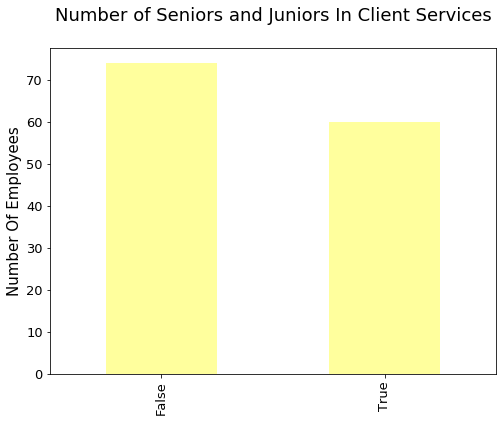

In [18]:
figsize=plt.figure(figsize=(8,6))
Manage=["Senios & Juniors"]
Data.loc[Data["Team"] =='Client Services' , 'Senior Management'].value_counts().plot(kind="bar",fontsize=13,color='#ffff9d')
plt.title("Number of Seniors and Juniors In Client Services\n",fontsize=18)
plt.ylabel("Number Of Employees",fontsize=15)
plt.show()



> ### Number of Male and Female

In [19]:
Data["Gender"].value_counts()

Female    576
Male      424
Name: Gender, dtype: int64

Text(0, 0.5, 'Number Of Employees')

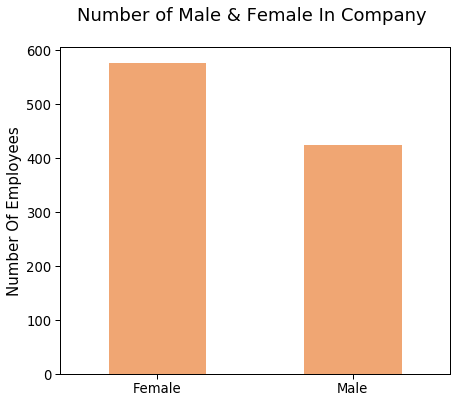

In [34]:
figsize=plt.figure(figsize=(8,6))

Data['Gender'].value_counts().plot(kind='bar',figsize=(7, 6), rot=0 , color='#f0a673');
plt.title("Number of Male & Female In Company \n",fontsize=18)
plt.ylabel("Number Of Employees",fontsize=15)



In [21]:
M=Data.loc[Data['Team']=='Marketing' , 'Salary'].max()
Data.loc[Data['Team']=='Client Services' , 'Salary'].max()
Data.loc[Data['Team']=='Finance' , 'Salary'].max()
Data.loc[Data['Team']=='Legal' , 'Salary'].max()
Data.loc[Data['Team']=='Engineering' , 'Salary'].max()
Data.loc[Data['Team']=='Business Development' , 'Salary'].max()
Data.loc[Data['Team']=='Human Resources' , 'Salary'].max()
Data.loc[Data['Team']=='Sales' , 'Salary'].max()

149654

> ### Salaries Of Each Department

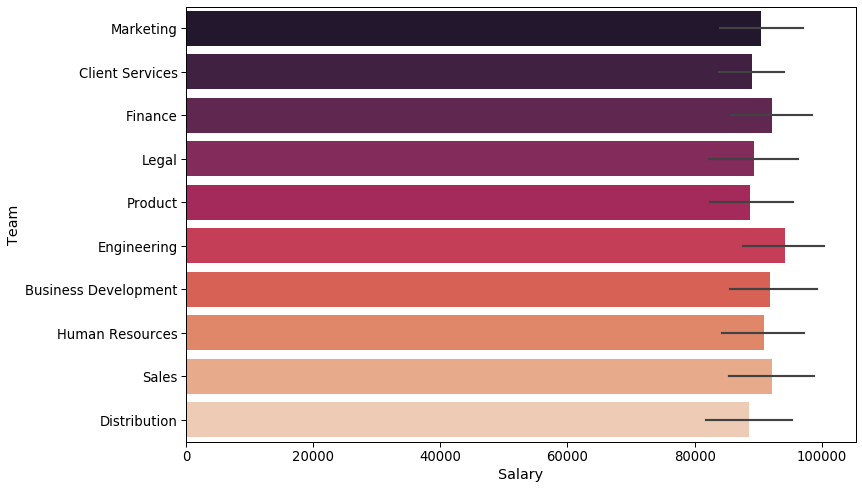

In [31]:
plt.figure(figsize=(12,8))
sns.set_context("paper", font_scale=1.5) 
sns.barplot(x='Salary', y= "Team",data=Data , palette="rocket")

> ### Highest Bonus Get Team

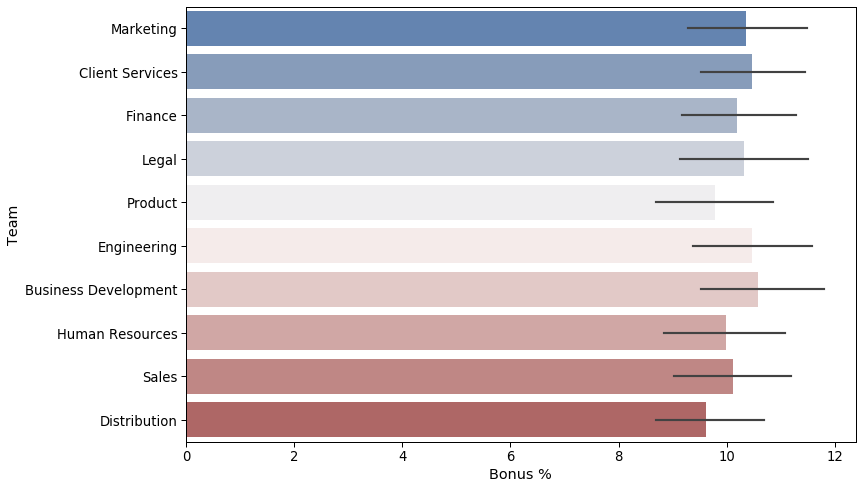

In [32]:
plt.figure(figsize=(12,8))
sns.set_context("paper", font_scale=1.5) 
sns.barplot(x='Bonus %', y= "Team",data=Data,palette="vlag")
# Data.columns

In [55]:
Corr=Data.corr()
Corr

,Salary,Bonus %
Salary,1.000000,-0.036381
Bonus %,-0.036381,1.000000


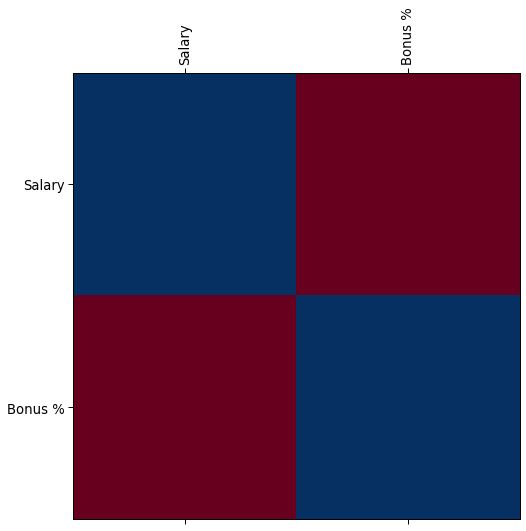

In [58]:
figure = plt.figure(figsize=(8,8))
plt.matshow(Corr, cmap='RdBu', fignum=figure.number)
plt.xticks(range(len(Corr.columns)),Corr.columns,rotation='vertical')
plt.yticks(range(len(Corr.columns)), Corr.columns);